##### IMPORT DATA

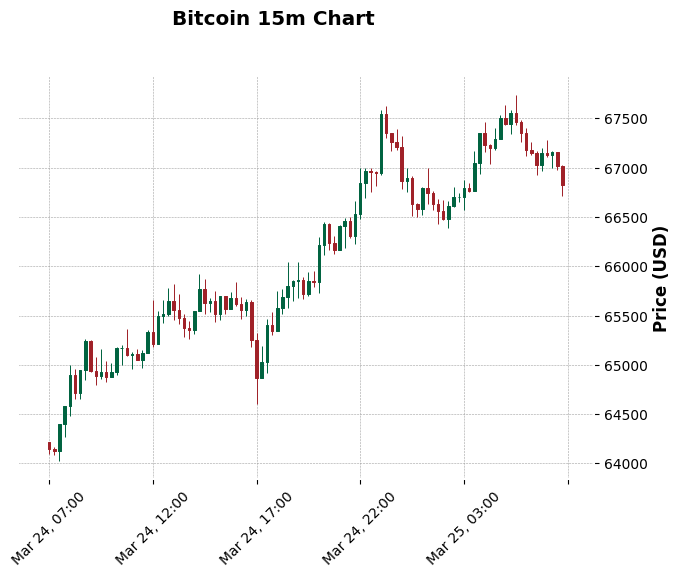

In [13]:
import pandas as pd
import mplfinance as mpf
import numpy as np

# Load the CSV file
df = pd.read_csv('./bitcoin_data_15m_2024_mars.csv', parse_dates=['datetime'], index_col='datetime')

# Rename columns to match mplfinance requirements
df.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
}, inplace=True)

# Specify the date range (modify 'starAt_date' and 'end_date' as needed)
start_date = '2024-03-24'
end_date = '2024-04-24'
df_filtered = df[start_date:end_date]

# Specify the number of charts to show (modify 'num_charts' as needed)
num_charts = 100
df_to_plot = df_filtered.head(num_charts)

# Plotting the data
mpf.plot(df_to_plot, type='candle', style='charles', volume=False, title="Bitcoin 15m Chart", ylabel='Price (USD)')

##### VOLUME

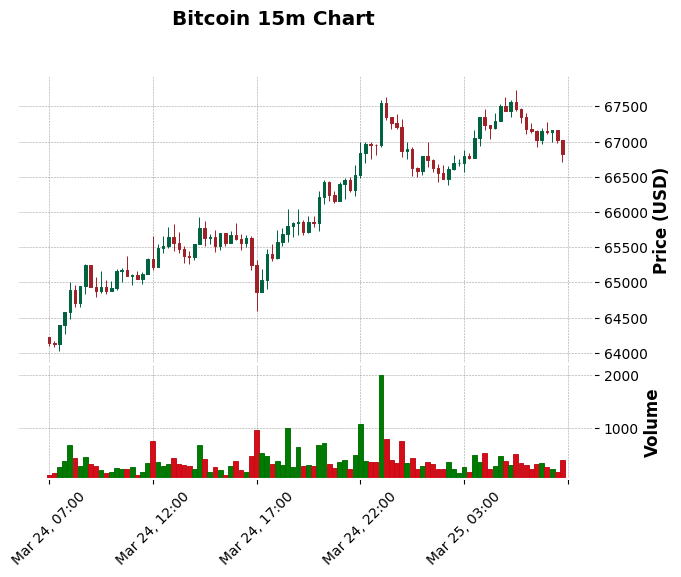

In [14]:
mpf.plot(df_to_plot, type='candle', style='charles', volume=True, title="Bitcoin 15m Chart", ylabel='Price (USD)')

##### MACD

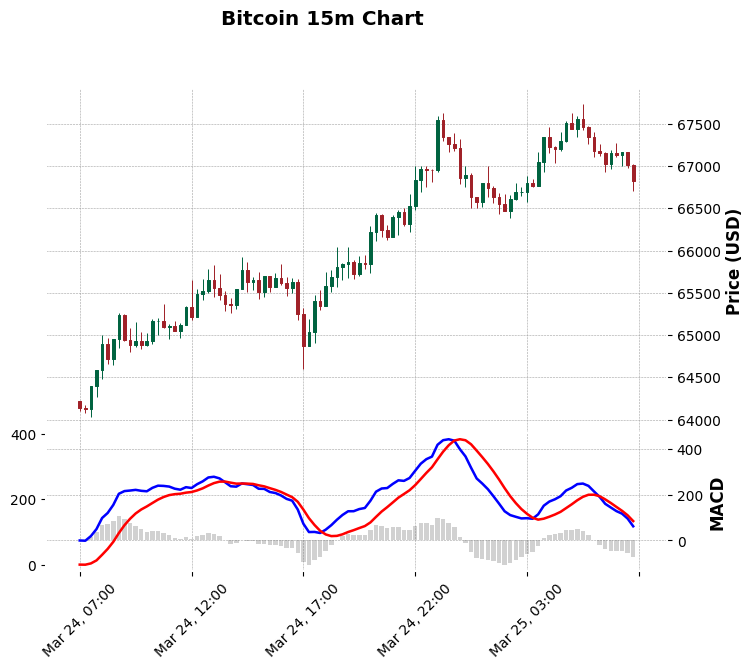

In [15]:
# Specify the number of charts to show (modify 'num_charts' as needed)
df_to_plot = df_filtered.head(num_charts).copy()  # Use .copy() to ensure it's a separate DataFrame

# Calculate MACD
exp1 = df_to_plot['Close'].ewm(span=12, adjust=False).mean()
exp2 = df_to_plot['Close'].ewm(span=26, adjust=False).mean()
macd = exp1 - exp2
signal = macd.ewm(span=9, adjust=False).mean()
macd_histogram = macd - signal  # This is the MACD histogram


# Use .loc to add MACD and Signal to DataFrame
df_to_plot.loc[:, 'MACD'] = macd
df_to_plot.loc[:, 'Signal'] = signal
df_to_plot.loc[:, 'Histogram'] = macd_histogram


# Create additional plots for MACD, Signal, and Histogram
apds = [
    mpf.make_addplot(df_to_plot['MACD'], panel=1, color='blue', ylabel='MACD'),
    mpf.make_addplot(df_to_plot['Signal'], panel=1, color='red'),
    mpf.make_addplot(df_to_plot['Histogram'], panel=1, type='bar', color='dimgray', alpha=0.3)  # Histogram as a bar chart
]

# Create additional plots for MACD, Signal, and Histogram
apds = [
    mpf.make_addplot(df_to_plot['MACD'], panel=1, color='blue', ylabel='MACD'),
    mpf.make_addplot(df_to_plot['Signal'], panel=1, color='red'),
    mpf.make_addplot(df_to_plot['Histogram'], panel=1, type='bar', color='dimgray', alpha=0.3)  # Histogram as a bar chart
]

# Plotting the data with MACD and Histogram
mpf.plot(df_to_plot, type='candle', addplot=apds, style='charles', volume=False, title="Bitcoin 15m Chart", ylabel='Price (USD)', figratio=(10, 8), figscale=1.2)

In [16]:
class MACDStrategy:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def evaluate_signals(self):
        # Generate signals based on MACD and Signal line crossovers
        self.dataframe['Signal'] = 0
        self.dataframe.loc[self.dataframe['MACD'] > self.dataframe['Signal'], 'Signal'] = 1  # Buy
        self.dataframe.loc[self.dataframe['MACD'] < self.dataframe['Signal'], 'Signal'] = -1  # Sell

    def get_trade_amount(self, total_amount, percent_of_wallet):
        # This method can be expanded based on more complex risk management strategies
        return total_amount * percent_of_wallet

    def execute_trade(self, current_signal, trade_amount):
        if current_signal == 1:
            print(f"Buy: Executing trade for ${trade_amount}")
        elif current_signal == -1:
            print(f"Sell: Executing trade for ${trade_amount}")
        else:
            print("Hold: No trade executed")

### WALLET

In [23]:
class MACDStrategy:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def evaluate_signals(self):
        # Generate signals based on MACD and Signal line crossovers
        self.dataframe['Signal'] = 0
        self.dataframe.loc[self.dataframe['MACD'] > self.dataframe['Signal'], 'Signal'] = 1  # Buy
        self.dataframe.loc[self.dataframe['MACD'] < self.dataframe['Signal'], 'Signal'] = -1  # Sell

    def execute_trade(self, current_signal, trade_amount, wallet):
        if current_signal == 1:
            print(f"Buy: Executing trade for ${trade_amount}")
            wallet.total_amount -= trade_amount  # Assuming buying reduces the wallet balance
        elif current_signal == -1:
            print(f"Sell: Executing trade for ${trade_amount}")
            wallet.total_amount += trade_amount  # Assuming selling increases the wallet balance
        print(f"Wallet balance after trade: ${wallet.total_amount}")

class TradingWallet:
    def __init__(self, total_amount, percent_of_wallet_per_trade):
        self.total_amount = total_amount
        self.percent_of_wallet_per_trade = percent_of_wallet_per_trade
        self.strategies = []
        print(f"Initial wallet balance: ${self.total_amount}")

    def add_strategy(self, strategy):
        self.strategies.append(strategy)

    def execute_trades(self):
        for strategy in self.strategies:
            strategy.evaluate_signals()
            # Iterate through signals and execute trades
            for index, row in strategy.dataframe.iterrows():
                current_signal = row['Signal']
                if current_signal != 0:  # Only execute on buy (-1) or sell (1) signals
                    trade_amount = self.get_trade_amount()
                    strategy.execute_trade(current_signal, trade_amount, self)

    def get_trade_amount(self):
        # Calculate trade amount based on the wallet's settings
        return self.total_amount * self.percent_of_wallet_per_trade

    def update_wallet(self, profit_loss):
        self.total_amount += profit_loss
        print(f"Updated wallet balance after profit/loss adjustment: ${self.total_amount}")

# Example usage
# Assuming df_to_plot and other setup is done as previously described
macd_strategy = MACDStrategy(df_to_plot)
wallet = TradingWallet(total_amount=1000, percent_of_wallet_per_trade=0.1)
wallet.add_strategy(macd_strategy)
wallet.execute_trades()
wallet.update_wallet(profit_loss=50)  # Example profit

Initial wallet balance: $1000
Sell: Executing trade for $100.0
Wallet balance after trade: $1100.0
Buy: Executing trade for $110.0
Wallet balance after trade: $990.0
Buy: Executing trade for $99.0
Wallet balance after trade: $891.0
Buy: Executing trade for $89.10000000000001
Wallet balance after trade: $801.9
Buy: Executing trade for $80.19
Wallet balance after trade: $721.71
Buy: Executing trade for $72.171
Wallet balance after trade: $649.539
Buy: Executing trade for $64.9539
Wallet balance after trade: $584.5851
Buy: Executing trade for $58.458510000000004
Wallet balance after trade: $526.12659
Buy: Executing trade for $52.612659
Wallet balance after trade: $473.51393099999996
Buy: Executing trade for $47.351393099999996
Wallet balance after trade: $426.16253789999996
Buy: Executing trade for $42.61625379
Wallet balance after trade: $383.54628411
Buy: Executing trade for $38.354628411
Wallet balance after trade: $345.19165569899997
Buy: Executing trade for $34.5191655699
Wallet bala

In [31]:
import backtrader as bt
import pandas as pd
import numpy as np

# Load your data with the correct index column
data = pd.read_csv('./bitcoin_data_15m_2024_mars.csv', parse_dates=True, index_col='datetime')
datafeed = bt.feeds.PandasData(dataname=data)

# Define the MACD Strategy
class MACDStrategy(bt.Strategy):
    params = (
        ('fast_ema', 12),
        ('slow_ema', 26),
        ('signal', 9),
        ('order_pct', 0.95),
        ('ticker', 'close')
    )

    def __init__(self):
        # Convert parameters to integers in case they are inadvertently passed as strings
        fast_ema = int(self.p.fast_ema)
        slow_ema = int(self.p.slow_ema)
        signal = int(self.p.signal)

        # Ensure the ticker data is accessed correctly and is numeric
        self.data_close = self.datas[0].close  # Accessing close price directly

        # Initialize MACD with integer periods
        self.macd = bt.indicators.MACD(self.data_close,
                                       period_me1=fast_ema,
                                       period_me2=slow_ema,
                                       period_signal=signal)

    def next(self):
        if not self.position:
            if self.macd.macd[0] > self.macd.signal[0]:
                self.buy(size=(self.broker.get_cash() / self.data_close[0]) * self.p.order_pct)
        else:
            if self.macd.macd[0] < self.macd.signal[0]:
                self.sell(size=self.position.size)

# Ensure the backtest function uses correct types for parameters
def backtest_strategy(params):
    fast_ema, slow_ema, signal = map(int, params)  # Convert parameters to integers
    cerebro = bt.Cerebro()
    cerebro.adddata(datafeed)
    cerebro.addstrategy(MACDStrategy, fast_ema=fast_ema, slow_ema=slow_ema, signal=signal)
    cerebro.broker.set_cash(10000)
    cerebro.addsizer(bt.sizers.PercentSizer, percents=10)
    cerebro.run()
    return cerebro.broker.getvalue()

# Parameter grid
fast_ema_range = range(10, 16)
slow_ema_range = range(24, 30)
signal_range = range(7, 10)

# Grid search
results = {}
for fast in fast_ema_range:
    for slow in slow_ema_range:
        for signal in signal_range:
            if slow > fast:  # Ensure slow EMA is greater than fast EMA
                final_value = backtest_strategy((fast, slow, signal))
                results[(fast, slow, signal)] = final_value

# Find the best parameters
best_params = max(results, key=results.get)
best_value = results[best_params]

print(f"Best Parameters: Fast EMA={best_params[0]}, Slow EMA={best_params[1]}, Signal={best_params[2]}")
print(f"Best Performance: ${best_value}")

Best Parameters: Fast EMA=11, Slow EMA=25, Signal=7
Best Performance: $10110.950184943304


In [27]:
import pandas as pd

# Load your data without setting the index_col
data = pd.read_csv('./bitcoin_data_15m_2024.csv', parse_dates=True)
print(data.columns)  # This will print the list of column names

Index(['datetime', 'open', 'high', 'low', 'close', 'volume', 'adj_close'], dtype='object')
